# Course Project: Machine Learning with python

### 1. Views about the problem statement
Creating a machine learning model which will help the company in determining the salary of newly
hired employees using the given data. TechWorks Consulting is a consulting company that specializes in providing top-notch IT talent
to a variety of businesses The company takes multiple factors into account
when determining an employee's salary,including the employee's experience, qualifications, and
performance. Employee data as well as various other features that can be responsible for
determining the employee's salary, such as the college an employee attends or the city
which the employee is coming, what the employee's previous CTC was, how much experience
that employee has, and his academic rec are given. As a data analyst at TechWorks Consulting, they have given me the task of creating a machine
learning model which will help them in determining the salary of newly hired employees using the given data.


### 2. What will be the approach to solving this task
* Data Understanding: Begin by thoroughly understanding the given data set.
* Data Preprocessing: Data pre-processing involves cleaning and transforming the data to make it suitable for training
a machine learning model. This can include tasks such a (1)Handling missing values (2)Outlier detection and treatment (3)Handling categorical variables (4)Normalization (5)Feature selection.
* Model Selection: Choose different Regression models.
* Model Training and Evaluation: (1)Partitioning of data into train and test data (2)Use appropriate evaluation metrics like MeanSquaredError(MSE) and R-squared to measure the model's accuracy (3)Select the model with the best performance.
* Model Optimization: Implementation of validation curves and Ensemble techniques.
* Model Comparision: Compare the performance of different models and select the one with the best accuracy.
:

In [3]:
# Import numpy for numerical operations
# Import pandas for data manipulation and analysis
# Import seaborn for data visualization

import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
# Read a csv file into a DataFrame

df = pd.read_csv('/ML case Study.csv')
colleges = pd.read_csv('/Colleges.csv')
cities = pd.read_csv('/cities.csv')

In [5]:
# Overview of data

df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [6]:
colleges.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [7]:
cities.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [8]:
# Converting Tier 1, Tier 2 and Tier 3 from colleges dataframe to list

Tier1=colleges["Tier 1"].tolist()
Tier1=[item for item in Tier1 if str(item) != 'nan']
Tier2=colleges["Tier 2"].tolist()
Tier2=[item for item in Tier2 if str(item) != 'nan']
Tier3=colleges["Tier 3"].tolist()
Tier3=[item for item in Tier3 if str(item) != 'nan']

In [9]:
Tier1

['IIT Bombay',
 'IIT Delhi',
 'IIT Kharagpur',
 'IIT Madras',
 'IIT Kanpur',
 'IIT Roorkee',
 'IIT Guwahati',
 'IIIT Hyderabad',
 'BITS Pilani (Pilani Campus)',
 'IIT Indore',
 'IIT Ropar',
 'IIT BHU (Varanasi)',
 'IIT ISM Dhanbad',
 'DTU',
 'NSUT Delhi (NSIT)',
 'NIT Tiruchipally (Trichy)',
 'NIT Warangal',
 'NIT Surathkal (Karnataka)',
 'Jadavpur University',
 'BITS Pilani (Hyderabad Campus)',
 'BITS Pilani (Goa Campus)',
 'IIIT Allahabad']

In [10]:
Tier2

['IIIT Bangalore',
 'IIIT Delhi',
 'IGDTUW',
 'NIT Calicut',
 'IIITM Gwalior',
 'IIIT Lucknow',
 'MNNIT Allahabad',
 'Punjab Engineering College',
 'DAIICT',
 'MNIT Jaipur',
 'NIT Durgapur',
 'VNIT Nagpur',
 'LNMIIT',
 'BIT Mesra',
 'SVNIT Surat',
 'NIT Jalandhar',
 'NIT Jamshedpur',
 'NIT Kurukshetra',
 'NIT Patna',
 'NIT Raipur',
 'NIT Bhopal',
 'NIT Rourkela',
 'NIT Silchar',
 'NIT Sikkim',
 'IIIT Jabalpur',
 'Jalpaiguri Government Engineering College',
 'IIEST/BESU Shibpur',
 'R.V. College of Engineering']

In [11]:
Tier3

['Ramaiah Institute of Technology, Bengaluru',
 'TIET/Thapar University',
 'Manipal Main Campus',
 'VIT Vellore',
 'SRM Main Campus',
 'KIIT, Bhubaneswar',
 'Amity University',
 'BMS College, Bangalore',
 'PES University, Bangalore',
 'USIT, Delhi',
 'MAIT, Delhi',
 'MSIT, Delhi',
 'Dayanand College of Engineering, Bangalore',
 'Heritage Institute of Technology, Kolkata',
 'IEM, Kolkata',
 'Techno India, Kolkata',
 'Jaypee, Noida',
 'Amrita University, Coimbatore',
 'Cummins College of Engineering for Women, Pune']

In [12]:
# Converting the values from list into Tier1=1, Tier2=2 and Tier3=3

for item in df['College']:
    if item in Tier1:
        df['College'].replace(item, 1, inplace=True)
    elif item in Tier2:
        df['College'].replace(item, 2, inplace=True)
    elif item in Tier3:
        df['College'].replace(item, 3, inplace=True)

In [13]:
# Converting Metro City and non-metro cities from cities to list

metro=cities["Metrio City"].tolist()
metro=[item for item in metro if str(item) != 'nan']
non_metro=cities["non-metro cities"].tolist()
non_metro=[item for item in non_metro if str(item) != 'nan']

In [14]:
# Converting the values from list into metro=1 and non_metro=0

for item in df['City']:
    if item in metro:
        df['City'].replace(item, 1, inplace=True)
    elif item in non_metro:
        df['City'].replace(item, 0, inplace=True)

In [15]:
# Checking null values

df.isnull().sum()

,0
College,0
City,0
Role,0
Previous CTC,0
Previous job change,0
Graduation Marks,0
EXP (Month),0
CTC,0


In [16]:
df.shape

(1589, 8)

In [17]:
# Information aboot the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   City                 1589 non-null   int64  
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int64(5), object(1)
memory usage: 99.4+ KB


In [18]:
df.describe()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,1.975456,0.514160,55518.453744,2.528634,59.855255,39.044682,75353.278798
std,0.838330,0.499957,6655.218445,1.123918,14.935139,14.108875,12587.288237
min,1.000000,0.000000,36990.000000,1.000000,35.000000,18.000000,53020.320000
25%,1.000000,0.000000,50518.000000,2.000000,46.000000,26.000000,66902.350000
50%,2.000000,1.000000,55291.000000,3.000000,60.000000,39.000000,73028.670000
75%,3.000000,1.000000,60109.000000,4.000000,73.000000,51.000000,80588.670000
max,3.000000,1.000000,77911.000000,4.000000,85.000000,64.000000,123416.990000


In [19]:
df=pd.get_dummies(df, drop_first=True)
df=df.replace({True:1, False:0})

In [62]:
df.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
0,2,0,55523.0,3,66,19,71406.58,1
1,2,0,57081.0,1,84,18,68005.87,0
2,3,0,60347.0,2,52,28,76764.02,0
3,3,0,49010.0,2,81,33,82092.39,0
4,1,0,57879.0,4,74,32,73878.10,0


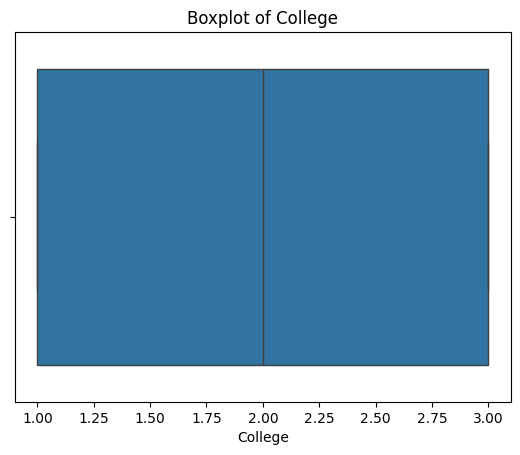

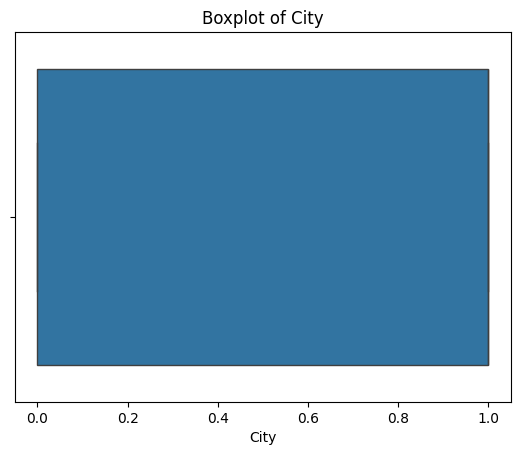

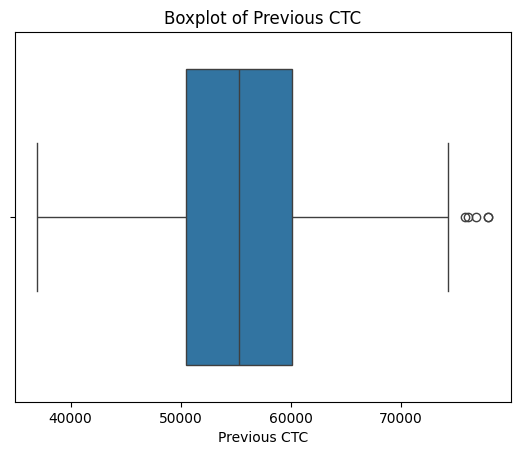

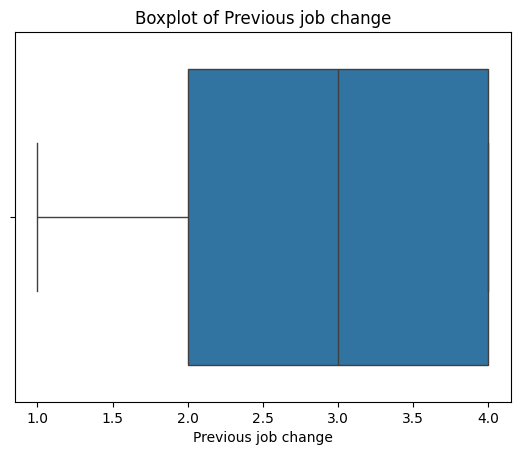

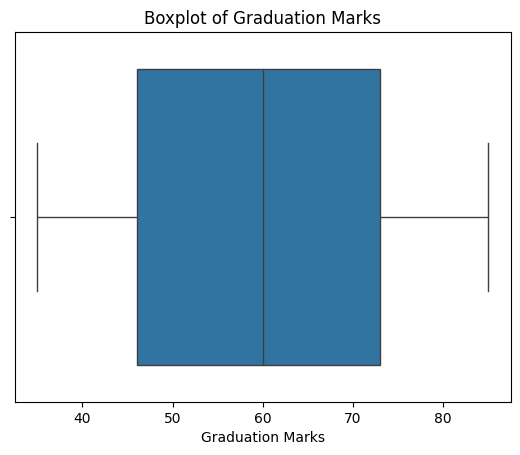

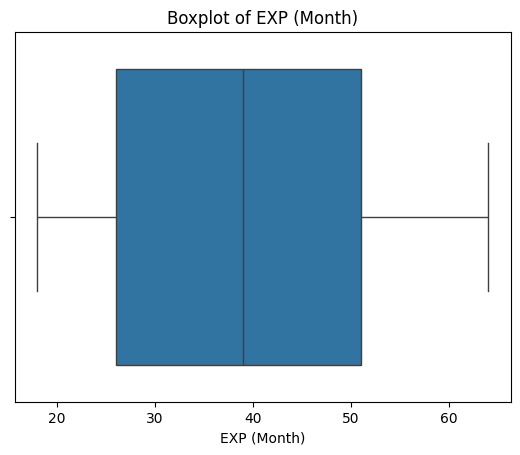

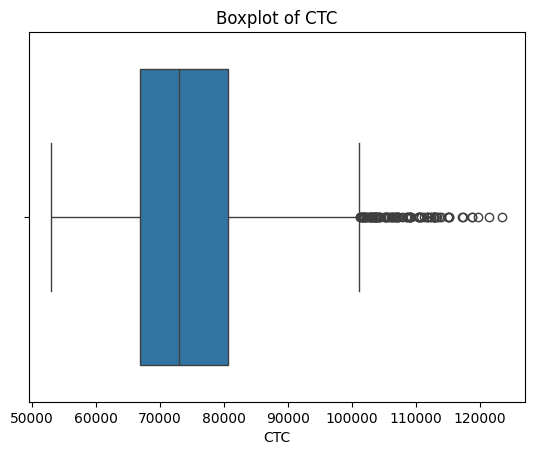

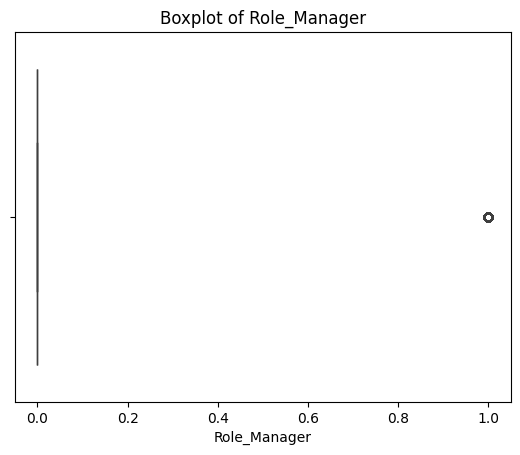

In [20]:
# Outlier Detection
# Creating a boxplot for each column

import matplotlib.pyplot as plt
for col in df.columns:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

##### As we can see that Previous CTC and CTC has outliers. Since it is Salary(CTC), one's CTC can be higher than others so, i am not going to treat the outliers as these outliers are not that extreme and if treated it may affect the data too.

In [21]:
# Correlation Matrix
corr=df.corr()
corr

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
College,1.000000,-0.014946,0.041979,-0.055060,0.003539,0.011752,-0.029592,-0.014749
City,-0.014946,1.000000,0.004644,0.051670,-0.018616,-0.023613,-0.020365,-0.048671
Previous CTC,0.041979,0.004644,1.000000,0.005756,-0.032976,0.119163,0.258000,0.012321
Previous job change,-0.055060,0.051670,0.005756,1.000000,0.019267,0.023488,0.011370,-0.017150
Graduation Marks,0.003539,-0.018616,-0.032976,0.019267,1.000000,-0.057061,-0.005450,0.017858
EXP (Month),0.011752,-0.023613,0.119163,0.023488,-0.057061,1.000000,0.301115,-0.026751
CTC,-0.029592,-0.020365,0.258000,0.011370,-0.005450,0.301115,1.000000,0.621311
Role_Manager,-0.014749,-0.048671,0.012321,-0.017150,0.017858,-0.026751,0.621311,1.000000


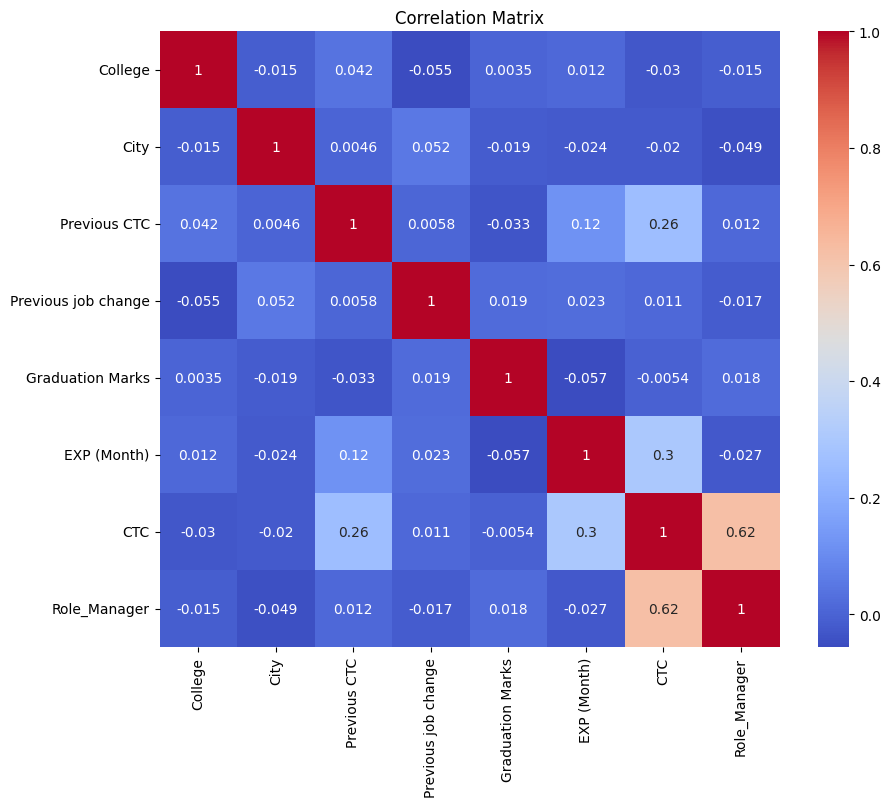

In [22]:
# Creating a heatmap

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## Multiple Linear Regression From sklearn.linear_model

In [23]:
# Selecting feature and target variable
x=df.loc[:, df.columns != 'CTC']  # Use all features except 'CTC' for prediction
y=df['CTC']

In [24]:
from sklearn.linear_model import LinearRegression

# creating a Linear Regression model
lm=LinearRegression()
lm.fit(x,y)
print(lm.intercept_,lm.coef_)

38421.10980690211 [-4.81514705e+02  3.80830787e+02  4.10090279e-01  1.26565295e+02
  6.23621203e+00  2.61344394e+02  1.94874279e+04]


## Multiple Linear Regression From statsmodels.api

In [25]:
import statsmodels.api as sn

# Creating x constant
x_cons=sn.add_constant(x)
lm2=sn.OLS(y,x_cons).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     259.1
Date:                Sun, 08 Sep 2024   Prob (F-statistic):          4.70e-257
Time:                        19:19:52   Log-Likelihood:                -16648.
No. Observations:                1589   AIC:                         3.331e+04
Df Residuals:                    1581   BIC:                         3.335e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.842e+04   2192.660     17.523      0.000    3.41e+04    4.27e+04
College              -481.5147    258.382     -1.864      0.063    -988.321      25.292
City                  380.8308    433.455      0.879      0.380    -469.377    1231.039
Previous CTC            0.4101      0.033     12.526      0.000       0.346       0.474
Previous job change   126.5653    192.887      0.656      0.512    -251.776     504.906
Graduation Marks        6.2362     14.502      0.430      0.667     -22.208      34.681
EXP (Month)           261.3444     15.460     16.904      0.000     231.020     291.669
Role_Manager         1.949e+04    534.694     36.446      0.000    1.84e+04    2.05e+04
==============================================================================
Omnibus:                       49.726   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.299
Skew:                           0.408   Prob(JB):                     9.82e-13
Kurtosis:                       3.411   Cond. No.                     5.68e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Train Test Split

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Splitting data into training testing sets
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("Shape of x_train, x_test, y_train, y_test:",x_train.shape, x_test.shape, y_train.shape, y_test.shape)

# Creating a Linear Regression model
model=LinearRegression()

# Training the model
model.fit(x_train, y_train)

# Calculating R^2 scores
r2_score_train = r2_score(y_train, model.predict(x_train))
r2_score_test = r2_score(y_test, model.predict(x_test))

# Calculating MeanSquaredError
mse_train = mean_squared_error(y_train, model.predict(x_train))
mse_test = mean_squared_error(y_test, model.predict(x_test))

print("r2_score - Train: {}, Test: {}".format(r2_score_train, r2_score_test))
print("mean_squared_error - Train: {}, Test: {}".format(mse_train, mse_test))

Shape of x_train, x_test, y_train, y_test: (1271, 7) (318, 7) (1271,) (318,)
r2_score - Train: 0.5137747142134839, Test: 0.5933517958385095
mean_squared_error - Train: 73096299.02751341, Test: 77362774.9495653


## Ridge Regression

In [27]:
# Standardizing the data

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

from sklearn.linear_model import Ridge

# Creating a Ridge Regression model with an alpha parameter of 0.5
ridge_model = Ridge(alpha=0.5)

# Fit the model to the training data
ridge_model.fit(x_train_s, y_train)

# Calculating R^2_scores
r2_score_train_ridge = r2_score(y_train, ridge_model.predict(x_train_s))
r2_score_test_ridge = r2_score(y_test, ridge_model.predict(x_test_s))

# Calculating MeanSquaredError
mse_train_ridge = mean_squared_error(y_train, ridge_model.predict(x_train_s))
mse_test_ridge = mean_squared_error(y_test, ridge_model.predict(x_test_s))

print("r2_score (Ridge) - Train: {}, Test: {}".format(r2_score_train_ridge, r2_score_test_ridge))
print("mean_squared_error (Ridge) - Train: {}, Test: {}".format(mse_train_ridge, mse_test_ridge))

r2_score (Ridge) - Train: 0.5137746367193257, Test: 0.5932834469083478
mean_squared_error (Ridge) - Train: 73096310.67753725, Test: 77375777.98965754


## Ridge Regression with Validation Curve

In [28]:
from sklearn.model_selection import validation_curve

# Define a range of alpha values
param_range = np.logspace(-2,8,100)
param_range

array([1.00000000e-02, 1.26185688e-02, 1.59228279e-02, 2.00923300e-02,
       2.53536449e-02, 3.19926714e-02, 4.03701726e-02, 5.09413801e-02,
       6.42807312e-02, 8.11130831e-02, 1.02353102e-01, 1.29154967e-01,
       1.62975083e-01, 2.05651231e-01, 2.59502421e-01, 3.27454916e-01,
       4.13201240e-01, 5.21400829e-01, 6.57933225e-01, 8.30217568e-01,
       1.04761575e+00, 1.32194115e+00, 1.66810054e+00, 2.10490414e+00,
       2.65608778e+00, 3.35160265e+00, 4.22924287e+00, 5.33669923e+00,
       6.73415066e+00, 8.49753436e+00, 1.07226722e+01, 1.35304777e+01,
       1.70735265e+01, 2.15443469e+01, 2.71858824e+01, 3.43046929e+01,
       4.32876128e+01, 5.46227722e+01, 6.89261210e+01, 8.69749003e+01,
       1.09749877e+02, 1.38488637e+02, 1.74752840e+02, 2.20513074e+02,
       2.78255940e+02, 3.51119173e+02, 4.43062146e+02, 5.59081018e+02,
       7.05480231e+02, 8.90215085e+02, 1.12332403e+03, 1.41747416e+03,
       1.78864953e+03, 2.25701972e+03, 2.84803587e+03, 3.59381366e+03,
      

In [29]:
# Perform validation curve to find best alpha value
train_scores, test_scores = validation_curve(Ridge(), x_train_s, y_train, param_name="alpha", param_range=param_range, scoring='r2')

In [30]:
print(train_scores)
print(test_scores)

[[5.10979008e-01 5.36437285e-01 4.99879242e-01 5.14327357e-01
  5.09289503e-01]
 [5.10979008e-01 5.36437285e-01 4.99879242e-01 5.14327357e-01
  5.09289503e-01]
 [5.10979008e-01 5.36437285e-01 4.99879242e-01 5.14327357e-01
  5.09289502e-01]
 [5.10979008e-01 5.36437285e-01 4.99879242e-01 5.14327357e-01
  5.09289502e-01]
 [5.10979008e-01 5.36437285e-01 4.99879242e-01 5.14327357e-01
  5.09289502e-01]
 [5.10979007e-01 5.36437284e-01 4.99879242e-01 5.14327356e-01
  5.09289502e-01]
 [5.10979007e-01 5.36437284e-01 4.99879241e-01 5.14327356e-01
  5.09289502e-01]
 [5.10979007e-01 5.36437284e-01 4.99879241e-01 5.14327356e-01
  5.09289501e-01]
 [5.10979006e-01 5.36437283e-01 4.99879240e-01 5.14327355e-01
  5.09289501e-01]
 [5.10979005e-01 5.36437282e-01 4.99879239e-01 5.14327354e-01
  5.09289499e-01]
 [5.10979003e-01 5.36437280e-01 4.99879237e-01 5.14327352e-01
  5.09289497e-01]
 [5.10979000e-01 5.36437277e-01 4.99879234e-01 5.14327349e-01
  5.09289494e-01]
 [5.10978995e-01 5.36437272e-01 4.998792

In [31]:
# Taking mean values of train_scores and test_scores
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
max(test_mean)

0.5029662449327639

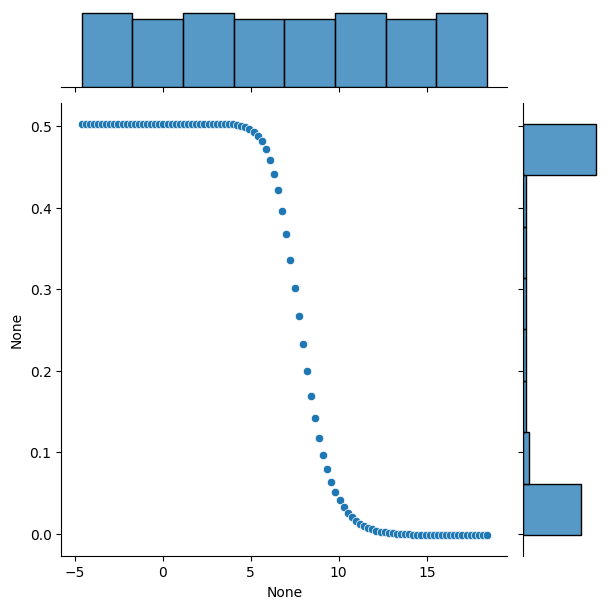

In [32]:
sns.jointplot(x=np.log(param_range), y=test_mean)

In [33]:
# Find the location of max test_mean
np.where(test_mean==max(test_mean))

(array([28]),)

In [34]:
param_range[28]

6.7341506577508214

In [35]:
ridge_model_best = Ridge(alpha=param_range[28])

In [36]:
# Fit the best ridge model
ridge_model_best.fit(x_train_s, y_train)

Ridge(alpha=6.7341506577508214)

In [37]:
# Calculating R^2_scores
r2_score_train_ridge = r2_score(y_train, ridge_model_best.predict(x_train_s))
r2_score_test_ridge = r2_score(y_test, ridge_model_best.predict(x_test_s))

# Calculating MeanSquaredError
mse_train_ridge = mean_squared_error(y_train, ridge_model_best.predict(x_train_s))
mse_test_ridge = mean_squared_error(y_test, ridge_model_best.predict(x_test_s))

print("r2_score (Ridge) - Train: {}, Test: {}".format(r2_score_train_ridge, r2_score_test_ridge))
print("mean_squared_error (Ridge) - Train: {}, Test: {}".format(mse_train_ridge, mse_test_ridge))

r2_score (Ridge) - Train: 0.513760794015264, Test: 0.5924250044902082
mean_squared_error (Ridge) - Train: 73098391.70965347, Test: 77539092.34078972


## Lasso Regression with Validation Curve

In [38]:
from sklearn.linear_model import Lasso

# Define a range of alpha values
param_range = np.logspace(-2,8,100)
param_range

# Perform validation curve to find best alpha value
train_scores, test_scores = validation_curve(Lasso(), x_train_s, y_train, param_name="alpha", param_range=param_range, scoring='r2')

# Taking mean values of train_scores and test_scores
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
max(test_mean)

0.5042343036049644

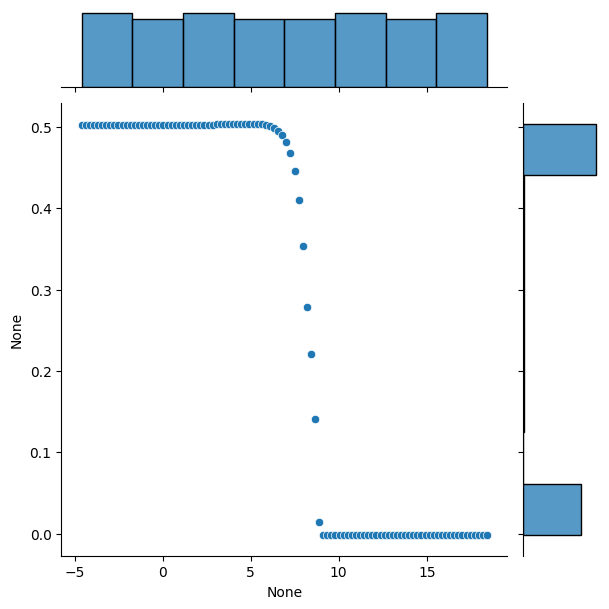

In [39]:
sns.jointplot(x=np.log(param_range), y=test_mean)

In [40]:
# Find the location of max test_mean
np.where(test_mean==max(test_mean))

(array([41]),)

In [41]:
param_range[41]

138.48863713938718

In [42]:
Lasso_model_best = Lasso(alpha=param_range[41])

In [43]:
# Fit the best ridge model
Lasso_model_best.fit(x_train_s, y_train)

Lasso(alpha=138.48863713938718)

In [44]:
# Calculating R^2_scores
r2_score_train_Lasso = r2_score(y_train, Lasso_model_best.predict(x_train_s))
r2_score_test_Lasso = r2_score(y_test, Lasso_model_best.predict(x_test_s))

# Calculating MeanSquaredError
mse_train_Lasso = mean_squared_error(y_train, Lasso_model_best.predict(x_train_s))
mse_test_Lasso = mean_squared_error(y_test, Lasso_model_best.predict(x_test_s))

print("r2_score (Lasso) - Train: {}, Test: {}".format(r2_score_train_Lasso, r2_score_test_Lasso))
print("mean_squared_error (Lasso) - Train: {}, Test: {}".format(mse_train_Lasso, mse_test_Lasso))

r2_score (Lasso) - Train: 0.5131181987432607, Test: 0.5892208565507875
mean_squared_error (Lasso) - Train: 73194995.76857243, Test: 78148665.36584131


## Decision Tree Regressor

In [45]:
from sklearn import tree

# Initialize the Decision Tree Regressor
regtree = tree.DecisionTreeRegressor(max_depth=3)

# Fit the model
regtree.fit(x_train,y_train)

# Calculating R^2_scores
r2_score_train = r2_score(y_train, regtree.predict(x_train))
r2_score_test = r2_score(y_test, regtree.predict(x_test))

# Calculating MeanSquaredError
mse_train = mean_squared_error(y_train, regtree.predict(x_train))
mse_test = mean_squared_error(y_test, regtree.predict(x_test))

print("r2_score - Train: {}, Test: {}".format(r2_score_train, r2_score_test))
print("mean_squared_error - Train: {}, Test: {}".format(mse_train, mse_test))

r2_score - Train: 0.6062958846879378, Test: 0.5949148978491664
mean_squared_error - Train: 59187201.04130625, Test: 77065402.6561772


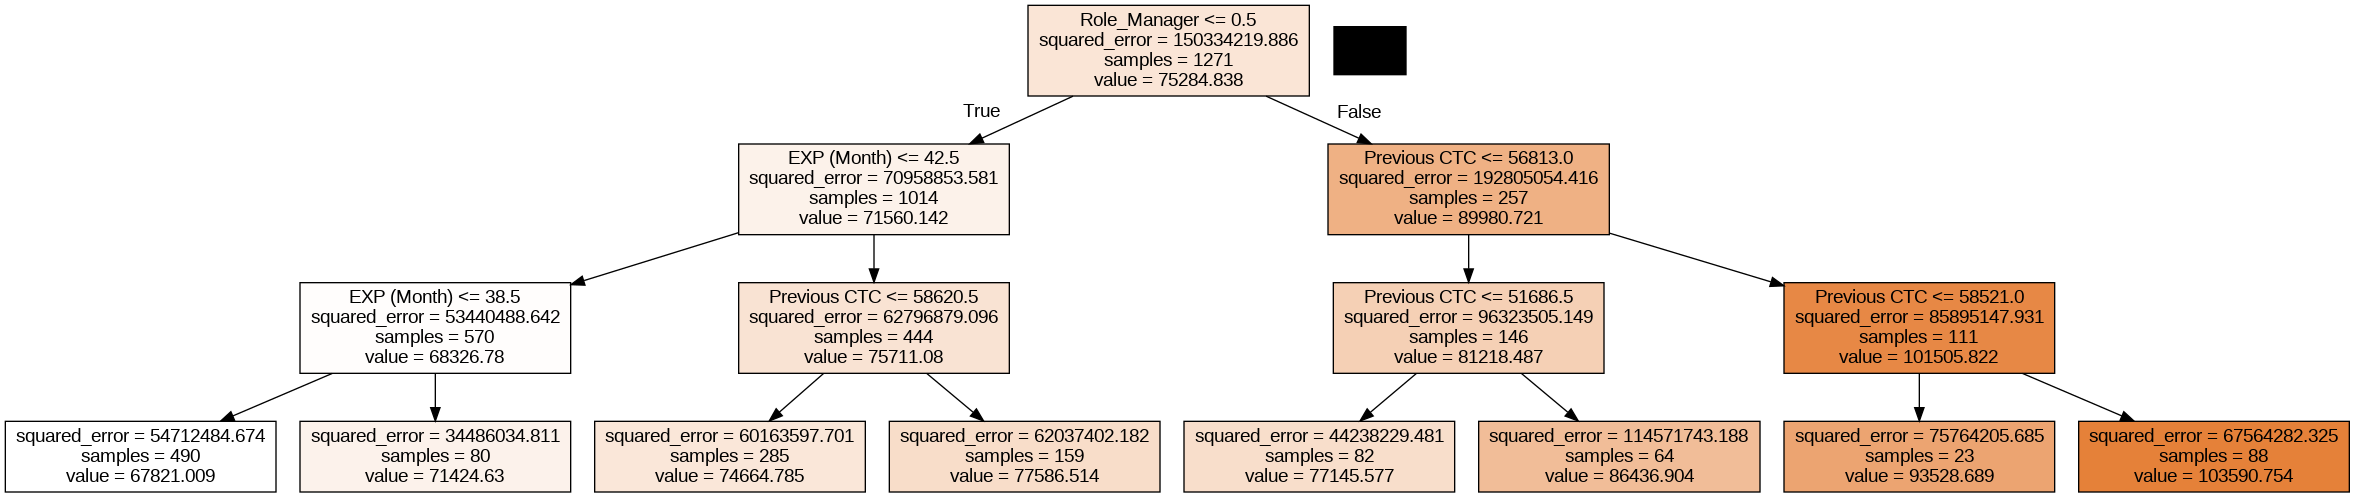

In [46]:
# Plotting Decision Tree
dot_data = tree.export_graphviz(regtree, out_file=None, feature_names=x_train.columns, filled=True, class_names=['CTC'])
from IPython.display import Image
import pydotplus
graph= pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

##  Bagging

In [47]:
from sklearn.ensemble import BaggingRegressor
regtree=tree.DecisionTreeRegressor()

# Initialize the BaggingRegressor
bag_reg = BaggingRegressor(estimator=regtree, n_estimators=1000, bootstrap=True, n_jobs=-1, random_state=42)

# Fit the model
bag_reg.fit(x_train, y_train)

# Calculating R^2_scores
r2_score_train_bag = r2_score(y_train, bag_reg.predict(x_train))
r2_score_test_bag = r2_score(y_test, bag_reg.predict(x_test))

# Calculating MeanSquaredError
mse_train_bag = mean_squared_error(y_train, bag_reg.predict(x_train))
mse_test_bag = mean_squared_error(y_test, bag_reg.predict(x_test))

print("r2_score (Bagging) - Train: {}, Test: {}".format(r2_score_train_bag, r2_score_test_bag))
print("mean_squared_error (Bagging) - Train: {}, Test: {}".format(mse_train_bag, mse_test_bag))

r2_score (Bagging) - Train: 0.9500843307211169, Test: 0.638161045564511
mean_squared_error (Bagging) - Train: 7504033.201123349, Test: 68838040.62949228


## Random Forests

In [48]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)

# Fit the model
rf_reg.fit(x_train, y_train)

# Calculating R^2_scores
r2_score_train_rf = r2_score(y_train, rf_reg.predict(x_train))
r2_score_test_rf = r2_score(y_test, rf_reg.predict(x_test))

# Calculating MeanSquaredError
mse_train_rf = mean_squared_error(y_train, rf_reg.predict(x_train))
mse_test_rf = mean_squared_error(y_test, rf_reg.predict(x_test))

print("r2_score (RF) - Train: {}, Test: {}".format(r2_score_train_rf, r2_score_test_rf))
print("mean_squared_error (RF) - Train: {}, Test: {}".format(mse_train_rf, mse_test_rf))

r2_score (RF) - Train: 0.9479622537580785, Test: 0.640953507323311
mean_squared_error (RF) - Train: 7823053.985899556, Test: 68306788.82906502


In [49]:
# Grid Search
from sklearn.model_selection import GridSearchCV

param_grid= {'n_estimators': [700,900,1000], 'max_depth': [10,15,20], 'min_samples_split': [2,5,10]}
grid_search = GridSearchCV(rf_reg, param_grid, cv=5, scoring='r2', n_jobs=-1)

In [50]:
# Fit the model
grid_search.fit(x_train,y_train)

# best hyperparameter
grid_search.best_params_

{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 900}

In [51]:
# Best estimator
best_reg_rf = grid_search.best_estimator_
best_reg_rf

RandomForestRegressor(max_depth=20, n_estimators=900, n_jobs=-1,
                      random_state=42)

In [52]:
# Calculating R^2_scores
r2_score_train_rfgs = r2_score(y_train, best_reg_rf.predict(x_train))
r2_score_test_rfgs = r2_score(y_test, best_reg_rf.predict(x_test))

# Calculating MeanSquaredError
mse_train_rfgs = mean_squared_error(y_train, best_reg_rf.predict(x_train))
mse_test_rfgs = mean_squared_error(y_test, best_reg_rf.predict(x_test))

print("r2_score (RF) - Train: {}, Test: {}".format(r2_score_train_rfgs, r2_score_test_rfgs))
print("mean_squared_error (RF) - Train: {}, Test: {}".format(mse_train_rfgs, mse_test_rfgs))

r2_score (RF) - Train: 0.9498749213264452, Test: 0.6370135890721698
mean_squared_error (RF) - Train: 7535514.599108096, Test: 69056338.45417948


## Gradient Boosting

In [53]:
from sklearn.ensemble import GradientBoostingRegressor
gb_reg = GradientBoostingRegressor()

param_grid= {'n_estimators': [100,200,300], 'max_depth': [3,4,5], 'learning_rate': [0.02,0.05,0.1]}
grid_search = GridSearchCV(gb_reg, param_grid, cv=5, scoring='r2', n_jobs=-1)

In [54]:
# Fit the model
grid_search.fit(x_train,y_train)

# best hyperparameter
grid_search.best_params_

{'learning_rate': 0.02, 'max_depth': 3, 'n_estimators': 200}

In [55]:
# Best estimator
best_reg_gb = grid_search.best_estimator_
best_reg_gb

GradientBoostingRegressor(learning_rate=0.02, n_estimators=200)

In [56]:
# Calculating R^2_scores
r2_score_train_gbgs = r2_score(y_train, best_reg_gb.predict(x_train))
r2_score_test_gbgs = r2_score(y_test, best_reg_gb.predict(x_test))

# Calculating MeanSquaredError
mse_train_gbgs = mean_squared_error(y_train, best_reg_gb.predict(x_train))
mse_test_gbgs = mean_squared_error(y_test, best_reg_gb.predict(x_test))

print("r2_score (GB) - Train: {}, Test: {}".format(r2_score_train_gbgs, r2_score_test_gbgs))
print("mean_squared_error (GB) - Train: {}, Test: {}".format(mse_train_gbgs, mse_test_gbgs))

r2_score (GB) - Train: 0.659222584216067, Test: 0.6189664945289237
mean_squared_error (GB) - Train: 51230506.95660967, Test: 72489707.39410038


## Ada Boost

In [57]:
from sklearn.ensemble import AdaBoostRegressor
ab_reg = AdaBoostRegressor()

param_grid= {'n_estimators': [50,100,200], 'learning_rate': [0.02,0.05,0.1], 'random_state': [42]}
grid_search = GridSearchCV(ab_reg, param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the model
grid_search.fit(x_train,y_train)

# best hyperparameter
grid_search.best_params_

{'learning_rate': 0.02, 'n_estimators': 100, 'random_state': 42}

In [58]:
# Best estimator
best_reg_ab = grid_search.best_estimator_
best_reg_ab

AdaBoostRegressor(learning_rate=0.02, n_estimators=100, random_state=42)

In [59]:
# Calculating R^2_scores
r2_score_train_abgs = r2_score(y_train, best_reg_ab.predict(x_train))
r2_score_test_abgs = r2_score(y_test, best_reg_ab.predict(x_test))

# Calculating MeanSquaredError
mse_train_abgs = mean_squared_error(y_train, best_reg_ab.predict(x_train))
mse_test_abgs = mean_squared_error(y_test, best_reg_ab.predict(x_test))

print("r2_score (AB) - Train: {}, Test: {}".format(r2_score_train_abgs, r2_score_test_abgs))
print("mean_squared_error (AB) - Train: {}, Test: {}".format(mse_train_abgs, mse_test_abgs))

r2_score (AB) - Train: 0.6193090648923301, Test: 0.6097243970265538
mean_squared_error (AB) - Train: 57230874.74704435, Test: 74247969.94590999


## XG Boost

In [61]:
import xgboost as xgb
xgb_reg = xgb.XGBRegressor(n_estimators=100, learning_rate=0.02, random_state=42)

# Define the hyperparameters
param_test = {'max_depth': [3,6,8], 'gamma': [0.1,0.2,0.3], 'subsample': [0.8,0.9], 'colsample_bytree': [0.8,0.9], 'reg_alpha': [0.01,0.1,1]}

# Grid search
grid_search = GridSearchCV(xgb_reg, param_test, cv=5, scoring='r2', n_jobs=-1)

# Fit the model
grid_search.fit(x_train,y_train)

# best hyperparameter
grid_search.best_params_

# Best estimator
best_reg_xgb = grid_search.best_estimator_
best_reg_xgb

# Calculating R^2_scores
r2_score_train_xgb = r2_score(y_train, best_reg_xgb.predict(x_train))
r2_score_test_xgb = r2_score(y_test, best_reg_xgb.predict(x_test))

# Calculating MeanSquaredError
mse_train_xgb = mean_squared_error(y_train, best_reg_xgb.predict(x_train))
mse_test_xgb = mean_squared_error(y_test, best_reg_xgb.predict(x_test))

print("r2_score (XGB) - Train: {}, Test: {}".format(r2_score_train_xgb, r2_score_test_xgb))
print("mean_squared_error (XGB) - Train: {}, Test: {}".format(mse_train_xgb, mse_test_xgb))

r2_score (XGB) - Train: 0.6144011897646602, Test: 0.588168394609992
mean_squared_error (XGB) - Train: 57968696.325660005, Test: 78348890.95502505


### 3. What were the available ML model options that had to be performed in this task?
* Multi Linear Regression
* Ridge Regression with Validation Curve
* Lasso Regression with Validation Curve
* Decision Tree Regressor
* Bagging
* Random Forest with GridSearchCV
* Gradient Boosting with GridSearchCV
* Ada Boost with GridSearchCV
* XG Boost with GridSearchCV

### 4. Which model’s performance is best and what could be the possible reason for that?
Random Forest Regressor model's performance is the best in this task. It has given high r2_scores for both train and test data (r2_score (RF) - Train: 0.9479622537580785, Test: 0.640953507323311).
Random Forest can handle both regression and classification tasks with a high degree of accuracy and reduces overfitting. It produces great results even without hyper-parameter tuning most of the time.

### 5. What steps can be taken to improve this selected model’s performance even further?
* Hyperparameter tuning: Perform more thorough hyperparameter tuning. Optimizing model parameters to find the best configuration for the data. GridSearchCV can help find the optimal combination of hyperparameters. By using GridSearchCV the model's performance can be improved even further.
* Cross-Validation: Use cross-validation techniques to evaluate model's performance and avoid overfitting.